<a href="https://colab.research.google.com/github/bdfd/Project_02-House_Model_Price_Prediction/blob/main/House_Model_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Model Price Prediction

## Basic Approach

Frame the Problem
A team of experts uses a rules-engine or their expert knowledge to try and predict the prices of housees. A rule engine is simply a piece of software that take an input, follows a set of rules and outputs the results.

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Regression Algorithm
3. Covert data into an array
4. Determine the target variable

Classification Model:
  *   1. Univariate Linear Regression 

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| R&D    | Spend on Research and Development                                   |
| Aministration      | Spend on administration events or activities            |
| Marketing Spend      | Spend on marketing and advertistment                  |
| State      | Company Location                                                |
| Profit      | Company earning by spending throughtout year                   |

In [ ]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.linear_model import LinearRegression

In [ ]:
# Read the dataset
data_dir = 'https://raw.githubusercontent.com/bdfd/Project_02-House_Model_Price_Prediction/main/dataset'
dataset_1 = 'housing.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_1), encoding = 'utf-8')
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [ ]:
print(f'the dataset_1 size is {df.shape}')

the dataset_1 size is (20640, 10)


In [ ]:
# Check column name and categories
df.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [ ]:
# Find any missing or null value
df.info()
# df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 0, (0.0%)



In [ ]:
# Varify the data type match with corresponding columns types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

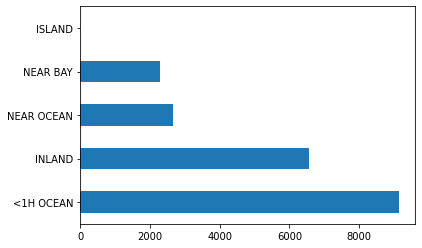

In [ ]:
df['ocean_proximity'].value_counts().plot(kind='barh')

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


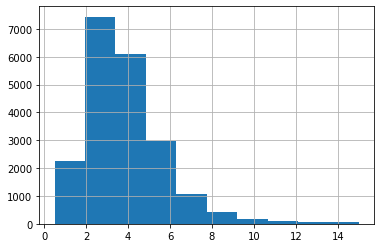

In [ ]:
df['median_income'].hist()

In [ ]:
df['income_category'] = pd.cut(df['median_income'],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5])
df['income_category'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_category, dtype: int64

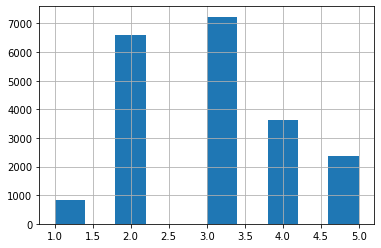

In [ ]:
df['income_category'].hist()

In [ ]:
# Analyze the cardinality of features
# Number of float type[constant, continous], categorical type[binary, non-binary]
# 1 non-binary categorical features: state
# 4 continuous features: r&d spend, administration, marketing spend, profit 

In [ ]:
# Drop duplicates
# df=df.drop_duplicates(subset=df.columns[1:], keep='first')

In [ ]:
# Fill missing values
# df['Column_Name'].fillna(value='Other', inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [ ]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=66)
# we create the test train split first

In [ ]:
pd.DataFrame(X_train).to_csv('train_x.csv')
pd.DataFrame(X_test).to_csv('test_x.csv')
pd.DataFrame(y_train).to_csv('train_y.csv')
pd.DataFrame(y_test).to_csv('test_y.csv')

In [ ]:
# from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

NameError: ignored

## Select a Performance Measure
For regression problems you have a couple of performance measures you can pick including:


*   MAE - Mean Absolute Error.This does not penalize large errors
*   MSE - Mean Squared Error. This is penalizes large errors
*   RMSE - Root Mean Squared Error. This penalizes large errors
*   R2 - Measures the strength of the relationship between the independent variables and the dependent variables by measuring the part of the variance of the dependent variable explained by the independent variable
*   RMSLE - Root Mean Squared Log Error
*   MAPE - Mean Absolute Percentage Error

In [ ]:
# from sklearn.model_selection import cross_val_score
score1 = cross_val_score(model,X_train, y_train, cv=5)
print("训练集上的平均精准度：%0.2f（+/-%0.2f）" % (score1.mean(),score1.std()*2))